# <div style="font-family: Trebuchet MS; background-color: #6C935C; color: #FFFFFF; padding: 12px; line-height: 1.5;">Importing Libraries</div>



In [1]:
import numpy as np
import pandas as pd
import cutecharts.charts as ctc
from cutecharts.faker import Faker
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/netflix_titles.csv')

In [3]:
print('-' * 40)
print('\nSize of Netflix data is {}\n'.format(data.shape))
print('-' * 40)
data.head()

----------------------------------------

Size of Netflix data is (8807, 12)

----------------------------------------


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
data = data.drop(['show_id'], axis=1)

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">1. | Introduction 👋</div>
<center>
    <img src="" alt="Heart Disease" width="80%">
</center>
<br>

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">Dataset Problems 🤔</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
👉 This dataset contains information about contains diagnoses of heart disease patients. Machine learning model is needed in order <mark><b>to determine whether a person has heart disease or not</b></mark>.</div>

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">Objectives of Notebook 📌</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>This notebook aims to:</b>
    <ul>
        <li> <mark><b>Perform dataset exploration</b></mark> using various types of data visualization.</li>
        <li> <mark><b>Build various ML models</b></mark> that can predict whether patients has heart disease or not.</li>
        <li> <mark><b>Export prediction & best model</b></mark> into text file.</li>
        <li> <mark><b>Perform prediction on new example data</b></mark> given.</li>
    </ul>
</div>

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">Machine Learning Modules 👨‍💻</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The <b>models</b> used in this notebook:
    <ol start="1">
        <li> <b>Logistic Regression</b>,</li>
        <li> <b>K-Nearest Neighbour (KNN)</b>,</li>
        <li> <b>Support Vector Machine (SVM)</b>,</li>
        <li> <b>Gaussian Naive Bayes</b>,</li>
        <li> <b>Decision Tree</b>,</li>
        <li> <b>Random Forest</b>,</li>
        <li> <b><span style="font-size: 8; background-color: #FFDF01;"><sup>*NEW*</sup></span> Extra Tree Classifier</b>,</li>
        <li> <b>Gradient Boosting</b>, and</li>
        <li> <b><span style="font-size: 8; background-color: #FFDF01;"><sup>*NEW*</sup></span> AdaBoost</b>.</li>
    </ol>
</div>

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">Dataset Description 🧾</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 There are <mark><b>14 variables</b></mark> in this dataset:
    <ul>
        <li> <b>9 categorical</b> variables, and</li>
        <li> <b>5 continuous</b> variables.</li>
    </ul>
</div>

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The following is the <b>structure of the dataset</b>.<br>
    

    
<hr>
<center>
    <b style="font-size: 20px";>  Check code in Github  👀 <a href="https://github.com/pritomsh/netflix-movies-tv-shows-data-analysis">Here </a> 📌</b><br><br>
    <b> Like this notebook? You can support me by giving upvote</b> 👍🔼<br>
    </center>
<hr>
</div>

# Handling Missing Data

- replace missing  countries with 'Not Specify'
- replace missing with 'No Director'
- replace missing cast with 'No Cast'

data.isnull().sum()

In [6]:
data['director'].replace(np.nan, 'No Director',inplace=True)
data['cast'].replace(np.nan, 'No Cast',inplace=True)
data['country'].replace(np.nan, 'Not Specify',inplace=True)
data.isnull().sum()

type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [7]:
data = data.dropna()
data.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [8]:
print('-' * 45)
print("\nStatstical information about given data \n")
print('-' * 45)
data.describe()

---------------------------------------------

Statstical information about given data 

---------------------------------------------


,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
print("\nCheck Duplicates")
data.duplicated().sum()


Check Duplicates


0

# Show Type of content 
# <div style="font-family: Trebuchet MS; background-color: #6C935C; color: #FFFFFF; padding: 12px; line-height: 1.5;">Importing Libraries</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>Importing libraries</b> that used in notebook.
</div>

In [10]:
data['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [11]:
t_values = data['type'].value_counts()
t_labels = data['type'].unique()

# pie chart 
pie = ctc.Pie('Payment Method Category', # title
              width='720px',height='720px')

# set the chart options
pie.set_options(labels=list(t_labels), # country names as labels
                inner_radius=0,                  # inner radius set to 0
                colors=['#ee333c','#168ab5'])

# label to be shown on graph
pie.add_series(list(t_values)) 

# display the charts
pie.render_notebook()


<h4>It is evident that there are more Movies on Netflix than TV shows.

In [12]:
#data['duration'].nunique()

In [13]:
data.rating.value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [14]:
newdata = data.groupby('rating').size().rename_axis('Rating').reset_index(name='Count')
nd = newdata.sort_values(by ='Count', ascending=True)
nd = nd.tail(5)

In [15]:
colors=['#FFF1C9', '#F7B7A3', '#EA5F89', '#9B3192', '#57167E', '#47B39C','#00529B']

chart = ctc.Bar('Payment Method Category', width='600px', height='200px')

chart.set_options(labels=list(nd.Rating),

            x_label='Category',

            y_label='Count',   

            colors=Faker.colors
)

chart.add_series('Geners',list(nd['Count']))

chart.render_notebook()

# Top Directors

In [16]:
fil_directors = data['director'].str.split(',',expand=True).stack()
fil_directors

0     0    Kirsten Johnson
1     0        No Director
2     0    Julien Leclercq
3     0        No Director
4     0        No Director
                ...       
8802  0      David Fincher
8803  0        No Director
8804  0    Ruben Fleischer
8805  0       Peter Hewitt
8806  0        Mozez Singh
Length: 9595, dtype: object

In [17]:
fil_directors= pd.DataFrame(fil_directors)
fil_directors.columns = ['director']
directors = fil_directors.groupby(['director']).size().reset_index(name='counts')
directors = directors.sort_values(by='counts',ascending=False)
directors = directors[directors['director'] != 'No Director']
directors = directors.head(5)
directors

,director,counts
4019,Rajiv Chilaka,22
4066,Raúl Campos,18
261,Jan Suter,18
4650,Suhas Kadav,16
3233,Marcus Raboy,16


In [18]:
colors=['#FFF1C9', '#F7B7A3', '#EA5F89', '#9B3192', '#57167E', '#47B39C','#00529B']

chart = ctc.Bar('Top Five Director', width='600px', height='200px')

chart.set_options(labels=list(directors.director),x_label='Director',y_label='Number of Movie', colors=Faker.colors)

chart.add_series('Geners',list(directors.counts))

chart.render_notebook()


In [19]:
r_year = data['release_year'].value_counts()

In [20]:
r_year= pd.DataFrame(r_year)


In [21]:
r_yearw = data.groupby(['release_year']).size().reset_index(name='counts')

In [22]:
oldest_r = data.sort_values("release_year", ascending = True)
oldest_r = oldest_r[oldest_r['duration'] != ""]
oldest_r[['title', "release_year"]][:10]

,title,release_year
4250,Pioneers: First Women Filmmakers*,1925
7790,Prelude to War,1942
8205,The Battle of Midway,1942
8763,WWII: Report from the Aleutians,1943
8739,Why We Fight: The Battle of Russia,1943
8660,Undercover: How to Operate Behind Enemy Lines,1943
8419,The Memphis Belle: A Story of a\nFlying Fortress,1944
8640,Tunisian Victory,1944
8436,The Negro Soldier,1944
7575,Nazi Concentration Camps,1945


In [23]:
new_r = data.sort_values("release_year", ascending = False)
new_r = new_r[new_r['duration'] != ""]
new_r[['title', "release_year"]][:10]

,title,release_year
693,Ali & Ratu Ratu Queens,2021
781,Black Holes | The Edge of All We Know,2021
762,Sweet & Sour,2021
763,Sweet Tooth,2021
764,Trippin' with the Kandasamys,2021
765,Xtreme,2021
766,Alan Saldaña: Locked Up,2021
767,Creator's File: GOLD,2021
768,Dancing Queens,2021
770,Myriam Fares: The Journey,2021


### Distribution of Content

In [24]:
fil_actors = data['cast'].str.split(',',expand=True).stack()
fil_actors= pd.DataFrame(fil_actors)
fil_actors.columns = ['cast']
actors = fil_actors.groupby(['cast']).size().reset_index(name='counts')
actors = actors.sort_values(by='counts',ascending=False)
actors = actors[actors['cast'] != 'No Cast']
actors = actors.head(10)
actors

,cast,counts
2605,Anupam Kher,39
26903,Rupa Bhimani,31
30263,Takahiro Sakurai,30
15518,Julie Tejwani,28
23591,Om Puri,27
38399,Shah Rukh Khan,26
25374,Rajesh Kava,26
33324,Yuki Kaji,25
4178,Boman Irani,25
1900,Andrea Libman,25


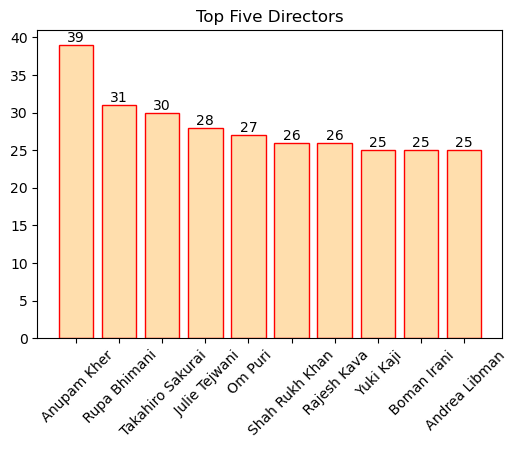

In [25]:
plt.figure(figsize=(6,4))
# Create bars with blue edge color
barplot1 = plt.bar(actors.cast, actors.counts, color=['navajowhite'],  edgecolor='red',align='center')
plt.xticks(rotation=45)
# Add title
plt.bar_label(barplot1, labels = actors.counts, label_type="edge")
plt.title('Top Five Directors',)
# Show graph
plt.show()

In [26]:
dff = data[['type','release_year']]
dff = dff.rename(columns = {'release_year' : 'Release Year'})
dff2 = dff.groupby(['Release Year','type']).size().reset_index(name='Total Content')
dff2 = dff2[dff2['Release Year']>=2010]
dff2.head()

,Release Year,type,Total Content
95,2010,Movie,153
96,2010,TV Show,39
97,2011,Movie,145
98,2011,TV Show,40
99,2012,Movie,173


In [27]:
dff3 = dff2[dff2['type']=='Movie']

dff4 = dff2[dff2['type']=='TV Show']

In [28]:
dff3

,Release Year,type,Total Content
95,2010,Movie,153
97,2011,Movie,145
99,2012,Movie,173
101,2013,Movie,225
103,2014,Movie,264
105,2015,Movie,396
107,2016,Movie,658
109,2017,Movie,765
111,2018,Movie,767
113,2019,Movie,633


In [29]:
dff4

,Release Year,type,Total Content
96,2010,TV Show,39
98,2011,TV Show,40
100,2012,TV Show,63
102,2013,TV Show,61
104,2014,TV Show,88
106,2015,TV Show,159
108,2016,TV Show,243
110,2017,TV Show,265
112,2018,TV Show,379
114,2019,TV Show,397


In [33]:
from cutecharts.charts import Line
chart = Line('10 Years of compound interest')
chart.set_options(
 labels=list(dff4['Release Year']), 
 x_label='Year', 
 y_label='End Year Amount',
)
chart.add_series('Movie', list(dff3['Total Content']))
chart.add_series('TV Show', list(dff4['Total Content']))
chart.render_notebook()
from cutecharts.charts import Line
chart = Line('10 Years of compound interest')
chart.set_options(
 labels=list(dff4['Release Year']), 
 x_label='Year', 
 y_label='End Year Amount',
)
chart.add_series('Movie', list(dff3['Total Content']))
chart.add_series('TV Show', list(dff4['Total Content']))
chart.render_notebook()
from cutecharts.charts import Line
chart = Line('10 Years of compound interest')
chart.set_options(
 labels=list(dff4['Release Year']), 
 x_label='Year', 
 y_label='End Year Amount',
)
chart.add_series('Movie', list(dff3['Total Content']))
chart.add_series('TV Show', list(dff4['Total Content']))
chart.render_notebook()

In [31]:
# Create a line chart
from cutecharts.charts import Line
chart = Line('Sales Trend', width='100%', height=500)
chart.set_options(labels=list(directors.director),x_label='Day', y_label='Sales')
chart.add_series(dff2['Release Year'], dff2['Total Content'])
chart.render_notebook()

TypeError: Object of type Series is not JSON serializable

In [ ]:
colors=['#FFF1C9', '#F7B7A3', '#EA5F89', '#9B3192', '#57167E', '#47B39C','#00529B']

chart = ctc.Line('Top Five Director', width='600px', height='200px')

chart.set_options(labels=list(dff2['Release Year']),x_label='Director',y_label='Number of Movie', colors=Faker.colors)

chart.add_series('type',list(dff2['Total Content']))

chart.render_notebook()

In [ ]:
# line chart
line = ctc.Line('Growth in Content over the Years',
                width='720px',height='720px')

# set the chart options
line.set_options(labels=list(content.index),
                 x_label='Years',
                 y_label='Count',
                 colors=['#ee333c'])
line.add_series('No: of releases', list(content['count']))

# display the chart
line.render_notebook()

In [ ]:
plt.plot(df['LOCAL_DATE'], df['MEAN_TEMPERATURE'], color='grey')
plt.plot(df['LOCAL_DATE'], df['MIN_TEMPERATURE'], color='blue')
plt.title('Toronto Temperature in 2020', fontsize=18)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Temperature', fontsize=12)
plt.grid(True)
plt.show()

# Movie ratings analysis

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

In [ ]:
# Countries with highest rated content.

country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

# Year wise analysis

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", 
                   data=netflix_movies, palette="Set2", 
                   order=netflix_movies['release_year'].value_counts().index[0:15])

# Lollipop plot of Genres vs their count on Netflix

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
features=['title','duration']
durations= data[features]
print(durations)

In [ ]:
durations['no_of_seasons']=durations['duration'].str.replace(' Season','')
print(durations)


In [ ]:
#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')
print(durations)

In [ ]:
nos= durations[durations['no_of_seasons']]
nos

In [ ]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)

In [ ]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

In [ ]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='red')

In [ ]:
data.head()

In [ ]:
data['country'].value_counts()

# Which Country release  movie 

In [ ]:
features=['country','type']
split_country= data[features]
print(split_country)

In [ ]:
split_country['aaa']=split_country['country'].str.replace(' United States','United States')

In [ ]:
split_country

In [ ]:
split_country['x'] = data['country'].str.split(',',expand=True).stack()
# split_country = split_country.value_counts()
split_country.head(50)

In [ ]:
split_country.value_counts()

In [ ]:
print(durations)

split_country = split_country.value_counts()


In [ ]:
split_country= pd.DataFrame(split_country)
split_country.columns = ['split_country']
split_country = fil_directors.groupby(['director']).size().reset_index(name='counts')
directors = directors.sort_values(by='counts',ascending=False)
directors = directors[directors['director'] != 'No Director']
# directors = directors.head(11)
# directors

In [ ]:
directors = directors.head(11)
directors

In [ ]:
us_series_data=data[data['country']=='United States']
us_series_data = us_series_data[us_series_data['type']=='Movie']
us_series_data.head()

In [ ]:
a = us_series_data.groupby(['rating']).size().reset_index(name='counts')

In [ ]:
type

<div style="border-radius:10px; border:maroon; padding: 15px; background-color: #E6CCE6; font-size:110%; text-align:left">

<h3 align="left"><font color='purple'>Conclusion:</font></h3>

* Since most of the ‍‍`Cabin` data is missing in both training and test datasets, this feature will not bring much information to the model and its imputation will bring a lot of noise. Therefore, we __remove `Cabin` from both datasets__.
* We fill in `Age`, `Embarked` and `Fare` missing values using different __imputation methods__.   

In [ ]:
insight

In [ ]:
https://www.kaggle.com/code/niharika41298/netflix-visualizations-recommendation-eda
 https://towardsdatascience.com/make-the-cutest-chart-in-python-visualize-your-data-with-hand-drawn-charts-f21157f76b4b